**Fourier Program A**

This program allows you to simulate a Fourier series, plotting the simulation of a periodic function f\(t\) and the corresponding frequency function F\(f\). You can simulate different periodic functions and study how the number of terms affects the simulation. The program assumes a function of periodicity 2π.

The coefficients of the function to be simulated are defined at line 6. n is the index of the Fourier term \(i.e. as appears in a<span style='font-size:x-small'>n</span> or b<span style='font-size:x-small'>n</span>\), α is a parameter that may be needed for some functions. If you need to use sine or cosine functions these are written as np.sin\(…\) and np.cos\(…\). π is written as np.pi . To calculate a power in Python use x\*\*n

Other parameters are:

●	Nmax: the number of terms used to simulate f\(t\) – must be an integer

●	N\_terms\_max: the number of terms shown when F\(f\) is plotted. If Nmax is large, chose a smaller value for N\_terms\_max for clarity

●	alpha:  set to the required value if needed, otherwise set to 0

●	ao: set to required value if using a cosine Fourier series with a nonzero average value, otherwise set to zero

●	series: set to sine or cosine depending on what type of Fourier series is being used

There are some suggested functions to investigate in the exercise sheet \(Python Fourier Session.docx\) but you are welcome to try others. One function is already defined in the program, which waveform does it correspond to?

Note: for series where, for example, only the odd terms are non\-zero, the coefficient can be defined by adding a term of the form  where abs takes the absolute value of the argument \(converts negative values to the positive equivalent\). 

Try at least two of the following:

●	Simulate at least two of the functions from the above table and study how increasing the value of Nmax improves the accuracy of the simulation.

●	Compare simulations of the square and triangular waves for relatively small values of Nmax \(e.g. 3~5\). Which gives the better accuracy and why?

●	Simulate ‘square pulses – width α of one period’ for different values of α \(e.g. 0.25, 0.1, 0.05\). For small values of α what does the envelope for the values of the a<span style='font-size:x-small'>n</span> coefficient \(the plot of F\(f\)\) remind you of, can you explain this?


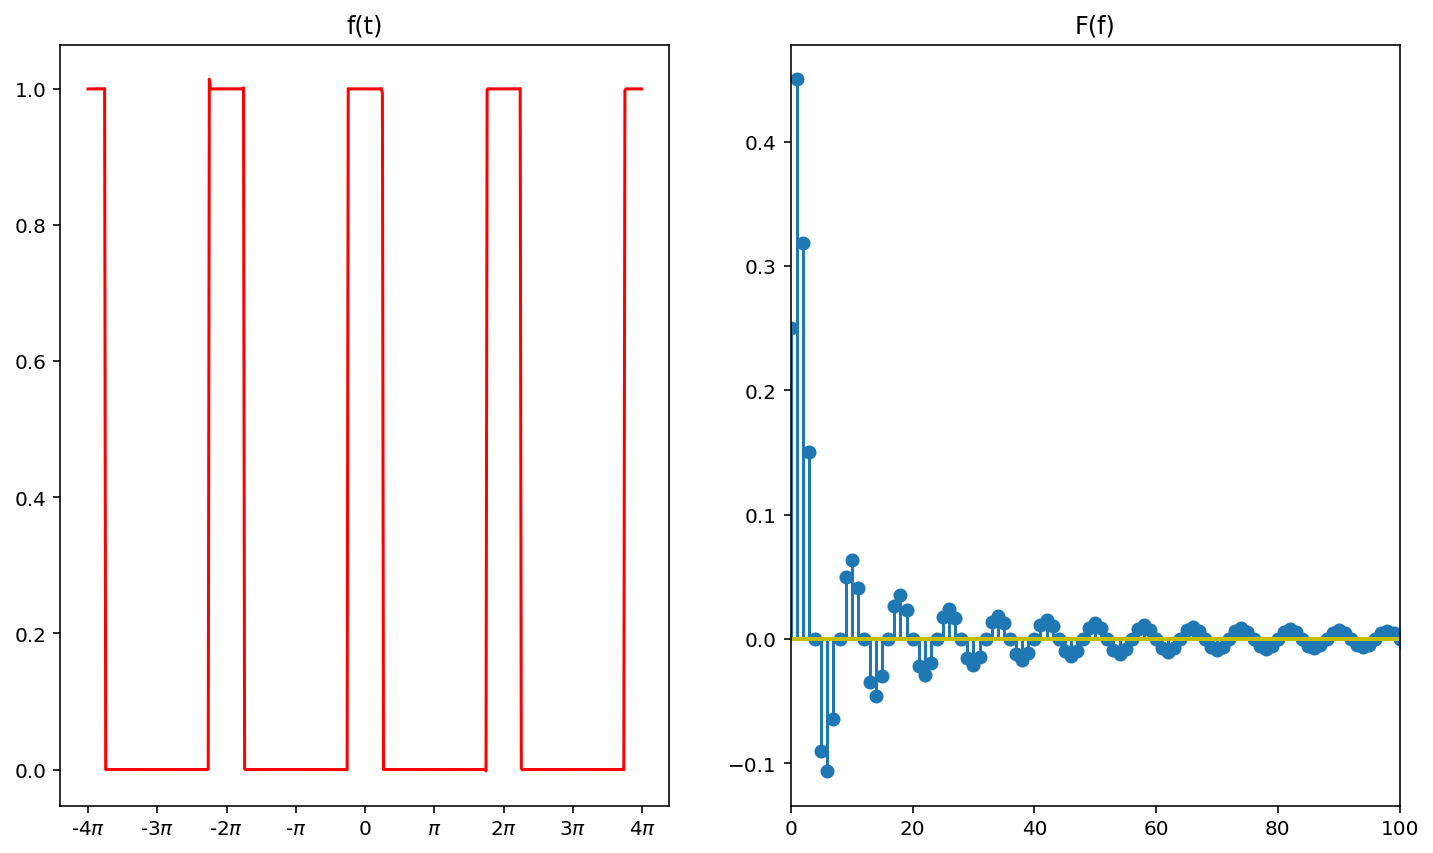

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# following defines function to calculate the Fourier coefficients, n is the index and alpha allows an additional parameter to be passed, eg width of pulses
def coeff(n, alpha):
    return (2/(n*np.pi))*np.sin(np.pi*alpha*n) # square pulses of width alpha
    

Nmax=10000 # number of terms in Fourier series
N_terms_max = 100 # number of terms to plot for F(f)
alpha=0.25 # half-width of non-zero section of wave (as fraction of pi)
ao=2*alpha # value of the ao coefficient if needed for a cosine series
series = 'cosine' # set to 'sine' or 'cosine'


# set up arrays to store data
x=np.arange(-4*np.pi, +4*np.pi, 0.05)
y=[]
w=np.zeros(Nmax)
z=np.zeros(Nmax)

# calculate the Fourier series
for t in x: # t is the variable of the function f(t)
    total=0 # used to hold sum of the Fourier coeffs evlauated for a specific t
    for n in range (1,Nmax+1):
        if series == 'cosine':
            total=total+coeff(n, alpha)*np.cos(n*t)
        else:
            total=total+coeff(n, alpha)*np.sin(n*t)
    y.append(ao/2+total)

# calculate the frequency function
for n in range(1,Nmax):
    w[n]=n
    z[n]=coeff(n, alpha)
z[0]=ao/2
        
# plot the Fourier series
plt.subplot(121)   
plt.xticks([-4*np.pi,-3*np.pi,-2*np.pi,-np.pi,0,np.pi,2*np.pi,3*np.pi,4*np.pi],(r"-4$\pi$",r"-3$\pi$", r"-2$\pi$", r"-$\pi$","0",r"$\pi$", r"2$\pi$",r"3$\pi$",r"4$\pi$" ))
plt.plot(x,y, 'r-')
plt.title('f(t)')

# plot the frequency function
plt.subplot(122)
plt.xlim([0,N_terms_max])

plt.stem(w,z)
plt.axhline(0, linewidth=2, color='y')
plt.title('F(f)')

plt.show()

#abs is to make sure all of the odd terms are negative to produce the correct wave

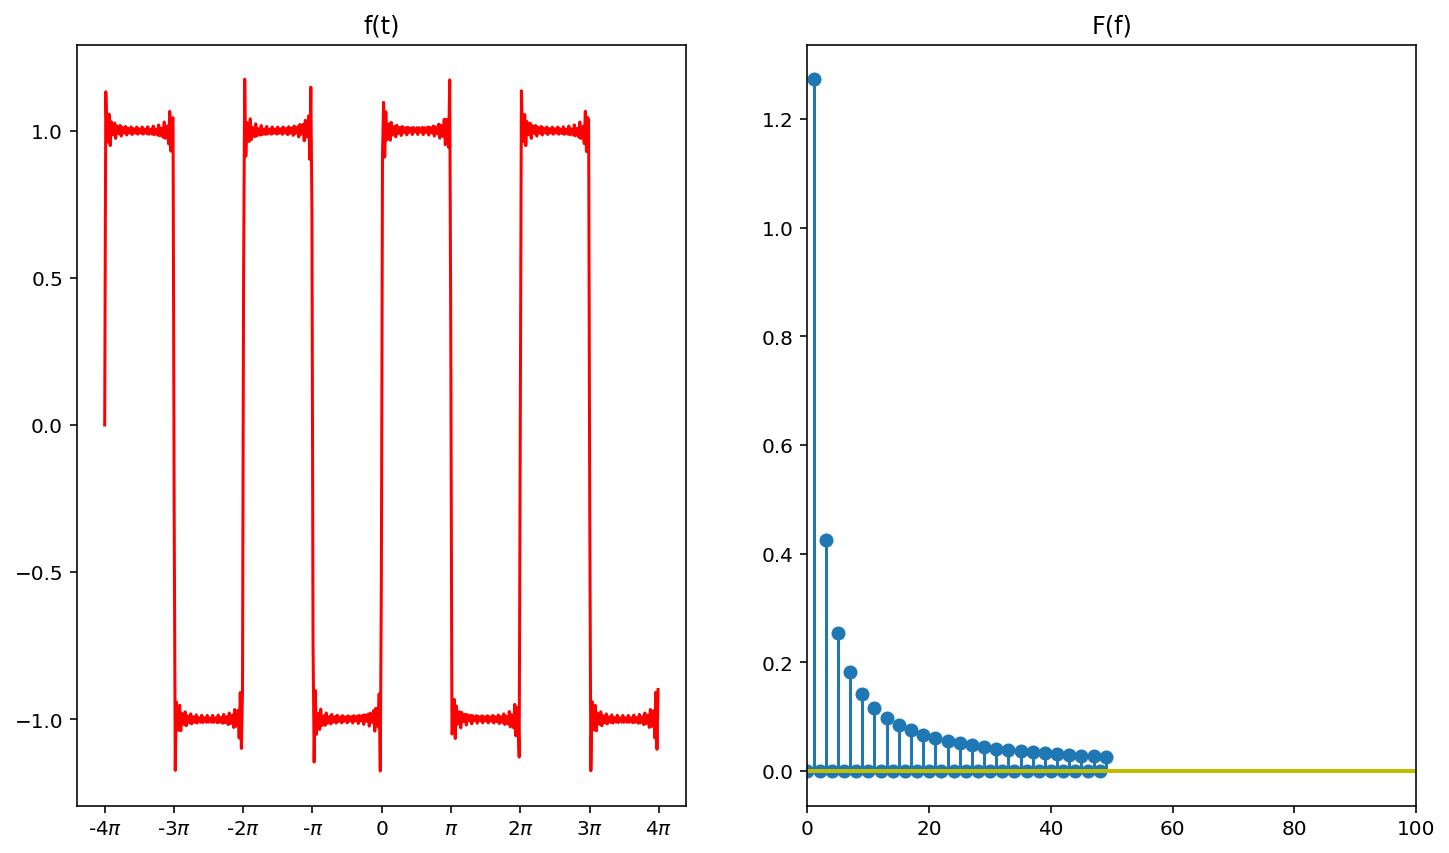

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# following defines function to calculate the Fourier coefficients, n is the index and alpha allows an additional parameter to be passed, eg width of pulses
def coeff(n):
    return (4/np.pi*n)*np.abs(np.sin(n*np.pi/2)) 
    4/(np.pi*n)*np.abs(np.sin(n*np.pi/2))

Nmax=50 # number of terms in Fourier series
N_terms_max = 100 # number of terms to plot for F(f)
ao=0 # value of the ao coefficient if needed for a cosine series
series = 'sine' # set to 'sine' or 'cosine'


# set up arrays to store data
x=np.arange(-4*np.pi, +4*np.pi, 0.05)
y=[]
w=np.zeros(Nmax)
z=np.zeros(Nmax)

# calculate the Fourier series
for t in x: # t is the variable of the function f(t)
    total=0 # used to hold sum of the Fourier coeffs evlauated for a specific t
    for n in range (1,Nmax+1):
        if series == 'cosine':
            total=total+coeff(n)*np.cos(n*t)
        else:
            total=total+coeff(n)*np.sin(n*t)
    y.append(ao/2+total)

# calculate the frequency function
for n in range(1,Nmax):
    w[n]=n
    z[n]=coeff(n)
z[0]=ao/2
        
# plot the Fourier series
plt.subplot(121)   
plt.xticks([-4*np.pi,-3*np.pi,-2*np.pi,-np.pi,0,np.pi,2*np.pi,3*np.pi,4*np.pi],(r"-4$\pi$",r"-3$\pi$", r"-2$\pi$", r"-$\pi$","0",r"$\pi$", r"2$\pi$",r"3$\pi$",r"4$\pi$" ))
plt.plot(x,y, 'r-')
plt.title('f(t)')

# plot the frequency function
plt.subplot(122)
plt.xlim([0,N_terms_max])

plt.stem(w,z)
plt.axhline(0, linewidth=2, color='y')
plt.title('F(f)')

plt.show()

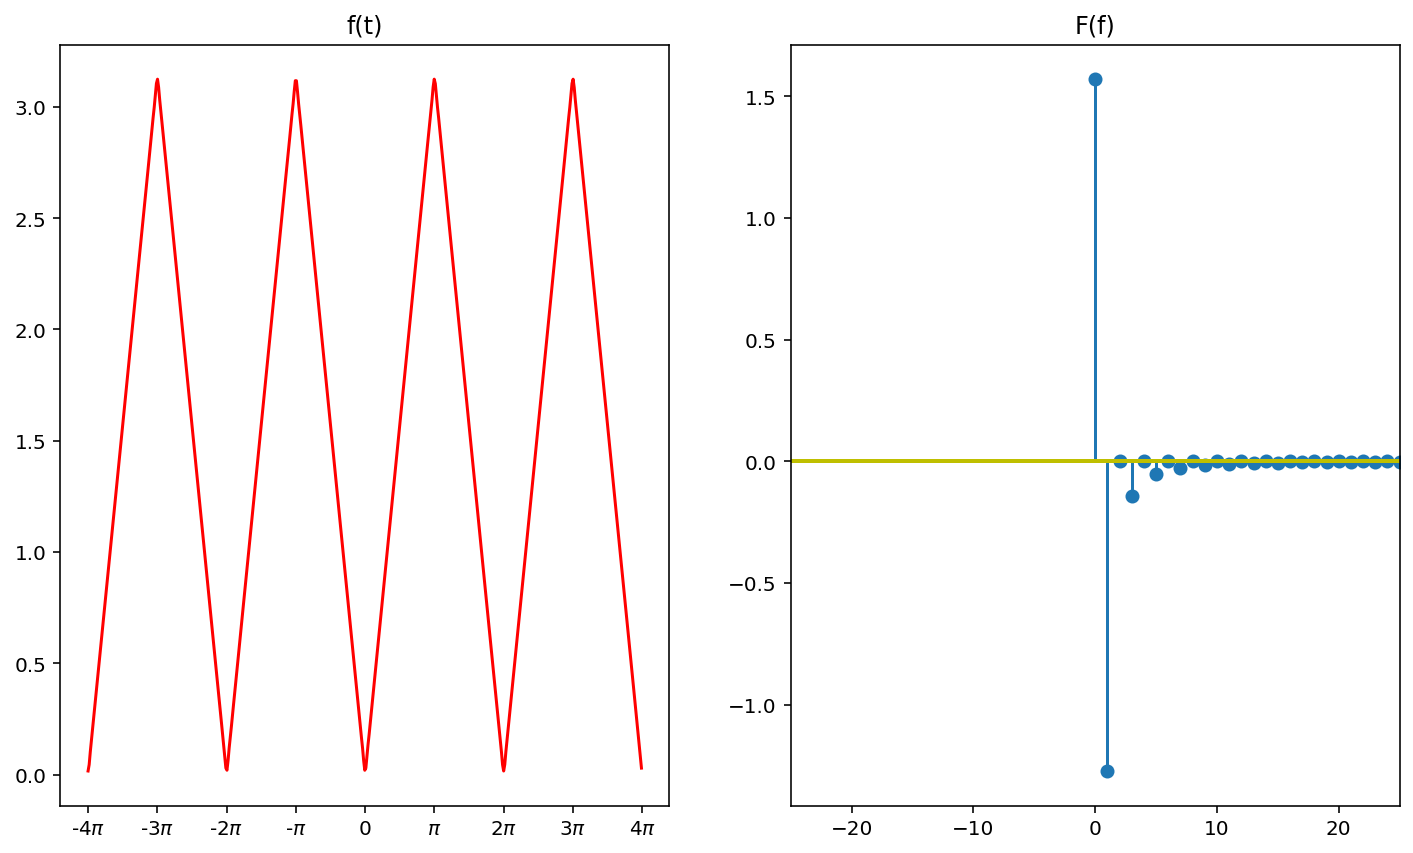

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# following defines function to calculate the Fourier coefficients, n is the index and alpha allows an additional parameter to be passed, eg width of pulses
def coeff(n):
    return ((-4/(n**2*np.pi))*np.abs(np.sin(n*np.pi/2))) 
    

Nmax=40 # number of terms in Fourier series
N_terms_max = 25 # number of terms to plot for F(f)
ao=np.pi # value of the ao coefficient if needed for a cosine series
series = 'cosine' # set to 'sine' or 'cosine'


# set up arrays to store data
x=np.arange(-4*np.pi, +4*np.pi, 0.05)
y=[]
w=np.zeros(Nmax)
z=np.zeros(Nmax)

# calculate the Fourier series
for t in x: # t is the variable of the function f(t)
    total=0 # used to hold sum of the Fourier coeffs evlauated for a specific t
    for n in range (1,Nmax+1):
        if series == 'cosine':
            total=total+coeff(n)*np.cos(n*t)
        else:
            total=total+coeff(n)*np.sin(n*t)
    y.append(ao/2+total)

# calculate the frequency function
for n in range(1,Nmax):
    w[n]=n
    z[n]=coeff(n)
z[0]=ao/2
        
# plot the Fourier series
plt.subplot(121)   
plt.xticks([-4*np.pi,-3*np.pi,-2*np.pi,-np.pi,0,np.pi,2*np.pi,3*np.pi,4*np.pi],(r"-4$\pi$",r"-3$\pi$", r"-2$\pi$", r"-$\pi$","0",r"$\pi$", r"2$\pi$",r"3$\pi$",r"4$\pi$" ))
plt.plot(x,y, 'r-')
plt.title('f(t)')

# plot the frequency function
plt.subplot(122)
plt.xlim([0,N_terms_max])

plt.stem(w,z)
plt.axhline(0, linewidth=2, color='y')
plt.title('F(f)')

plt.show()



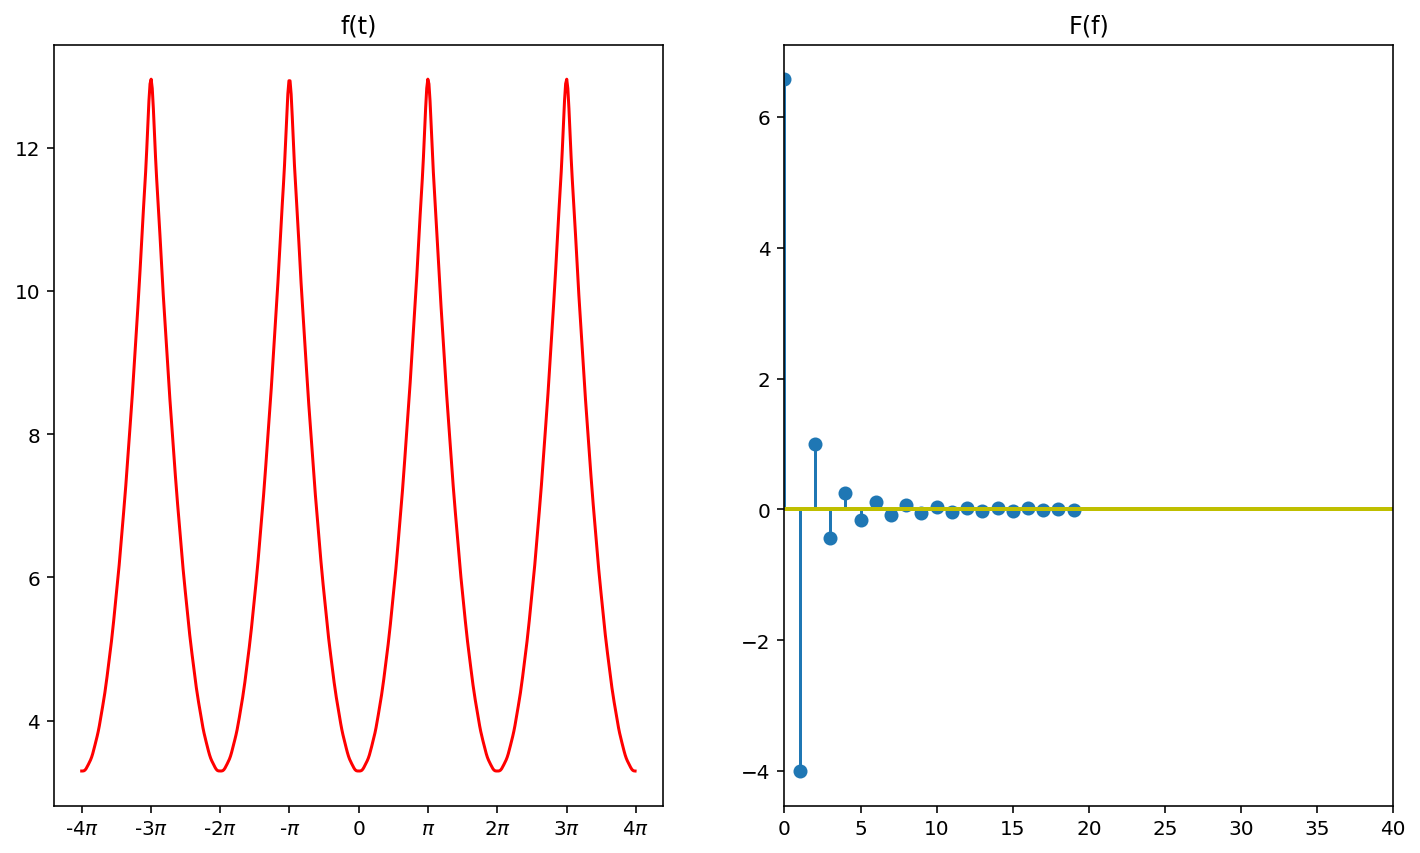

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# following defines function to calculate the Fourier coefficients, n is the index and alpha allows an additional parameter to be passed, eg width of pulses
def coeff(n):
    return 4*(-1)**n/n**2 # square pulses of width alpha
    

Nmax=20 # number of terms in Fourier series
N_terms_max = 40 # number of terms to plot for F(f)

ao=4*np.pi**2/3# value of the ao coefficient if needed for a cosine series
series = 'cosine' # set to 'sine' or 'cosine'


# set up arrays to store data
x=np.arange(-4*np.pi, +4*np.pi, 0.05)
y=[]
w=np.zeros(Nmax)
z=np.zeros(Nmax)

# calculate the Fourier series
for t in x: # t is the variable of the function f(t)
    total=0 # used to hold sum of the Fourier coeffs evlauated for a specific t
    for n in range (1,Nmax+1):
        if series == 'cosine':
            total=total+coeff(n)*np.cos(n*t)
        else:
            total=total+coeff(n)*np.sin(n*t)
    y.append(ao/2+total)

# calculate the frequency function
for n in range(1,Nmax):
    w[n]=n
    z[n]=coeff(n)
z[0]=ao/2
        
# plot the Fourier series
plt.subplot(121)   
plt.xticks([-4*np.pi,-3*np.pi,-2*np.pi,-np.pi,0,np.pi,2*np.pi,3*np.pi,4*np.pi],(r"-4$\pi$",r"-3$\pi$", r"-2$\pi$", r"-$\pi$","0",r"$\pi$", r"2$\pi$",r"3$\pi$",r"4$\pi$" ))
plt.plot(x,y, 'r-')
plt.title('f(t)')

# plot the frequency function
plt.subplot(122)
plt.xlim([0,N_terms_max])

plt.stem(w,z)
plt.axhline(0, linewidth=2, color='y')
plt.title('F(f)')

plt.show()



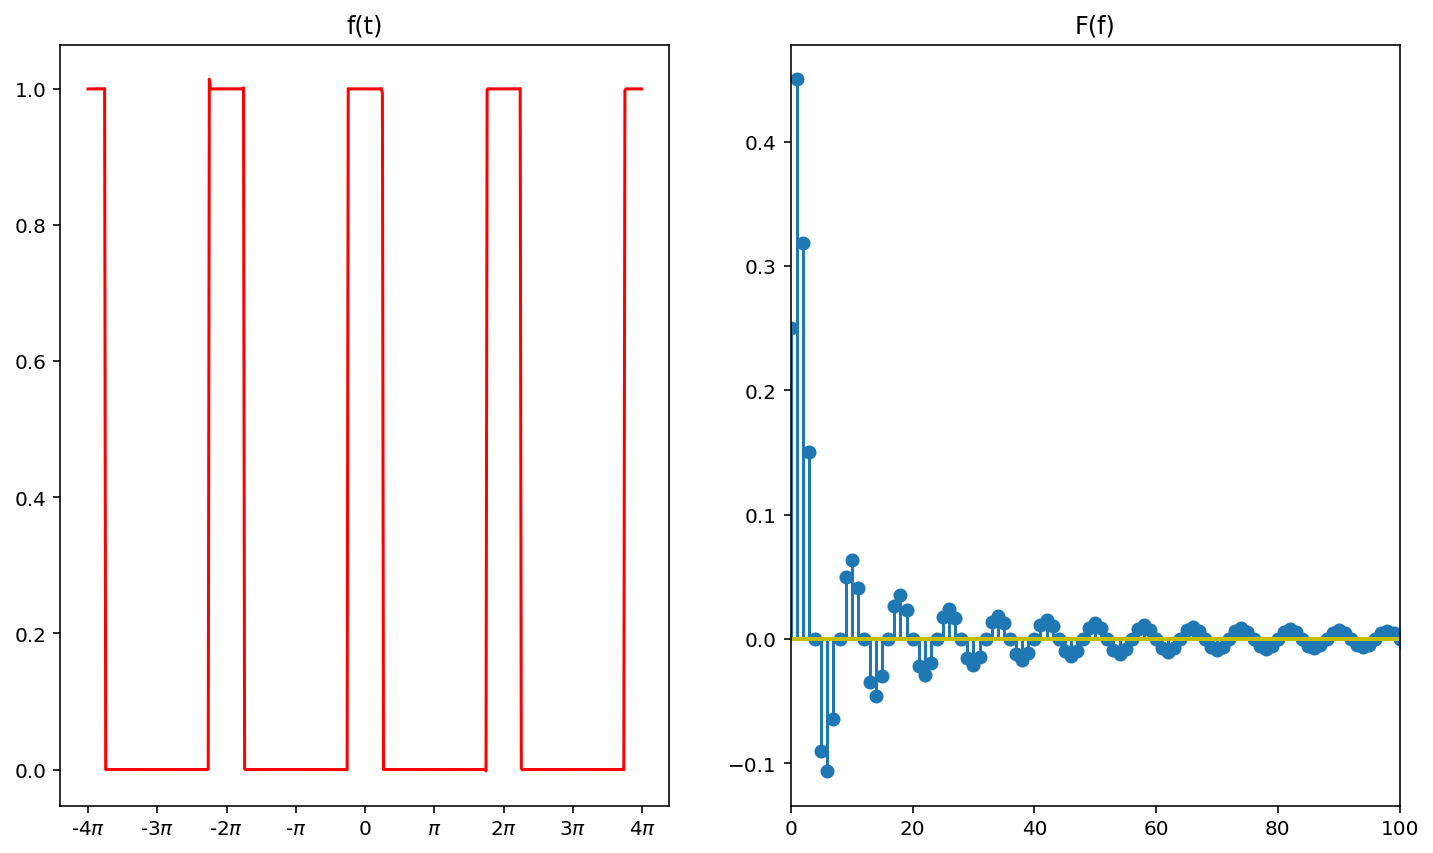

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# following defines function to calculate the Fourier coefficients, n is the index and alpha allows an additional parameter to be passed, eg width of pulses
def coeff(n, alpha):
    return (2/(n*np.pi))*np.sin(np.pi*alpha*n) # square pulses of width alpha
    

Nmax=10000 # number of terms in Fourier series
N_terms_max = 100 # number of terms to plot for F(f)
alpha=0.25 # half-width of non-zero section of wave (as fraction of pi)
ao=2*alpha # value of the ao coefficient if needed for a cosine series
series = 'cosine' # set to 'sine' or 'cosine'


# set up arrays to store data
x=np.arange(-4*np.pi, +4*np.pi, 0.05)
y=[]
w=np.zeros(Nmax)
z=np.zeros(Nmax)

# calculate the Fourier series
for t in x: # t is the variable of the function f(t)
    total=0 # used to hold sum of the Fourier coeffs evlauated for a specific t
    for n in range (1,Nmax+1):
        if series == 'cosine':
            total=total+coeff(n, alpha)*np.cos(n*t)
        else:
            total=total+coeff(n, alpha)*np.sin(n*t)
    y.append(ao/2+total)

# calculate the frequency function
for n in range(1,Nmax):
    w[n]=n
    z[n]=coeff(n, alpha)
z[0]=ao/2
        
# plot the Fourier series
plt.subplot(121)   
plt.xticks([-4*np.pi,-3*np.pi,-2*np.pi,-np.pi,0,np.pi,2*np.pi,3*np.pi,4*np.pi],(r"-4$\pi$",r"-3$\pi$", r"-2$\pi$", r"-$\pi$","0",r"$\pi$", r"2$\pi$",r"3$\pi$",r"4$\pi$" ))
plt.plot(x,y, 'r-')
plt.title('f(t)')

# plot the frequency function
plt.subplot(122)
plt.xlim([0,N_terms_max])

plt.stem(w,z)
plt.axhline(0, linewidth=2, color='y')
plt.title('F(f)')

plt.show()



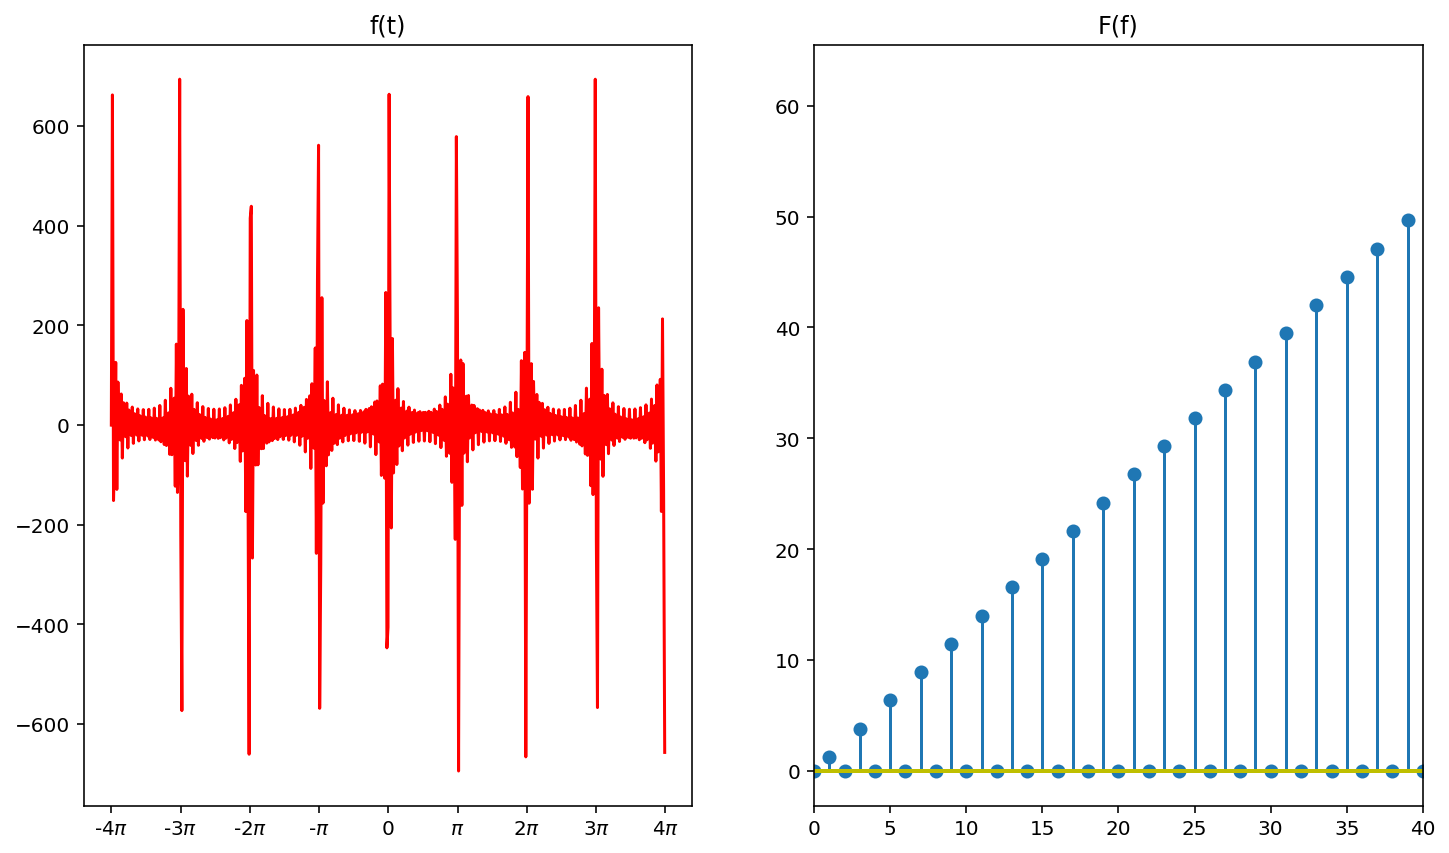

In [30]:
#square wave. also, why no -N_terms_max? Wdith of F(f)?
